<a href="https://colab.research.google.com/github/sujag281/dataanalysis/blob/main/%EC%98%A8%EB%9D%BC%EC%9D%B8%EC%87%BC%ED%95%91%EB%AA%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,664 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and dire

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
# plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
plt.rcParams['axes.unicode_minus'] = False

## 1.데이타 수집 및 전처리

In [31]:
filename = '온라인쇼핑몰_취급상품범위별_상품군별거래액_20240430115144.csv'
df = pd.read_csv(filename, encoding='utf-8')
df

,상품군별(1),상품군별(2),범위별(1),2024.01 p),2024.02 p),2021,2022,2023
0,합계,소계,계,20301326,18976586,190223110,211123590,228860713
1,합계,소계,종합몰,12792543,11877564,123851756,132772279,140957966
2,합계,소계,전문몰,7508783,7099022,66371354,78351311,87902747
3,컴퓨터 및 주변기기,소계,계,888577,845974,9517073,9131376,8709380
4,컴퓨터 및 주변기기,소계,종합몰,648877,627468,6950027,6774247,6543675
...,...,...,...,...,...,...,...,...
73,기타서비스,소계,종합몰,145708,134703,1513581,1406200,1345590
74,기타서비스,소계,전문몰,125509,101446,692806,1066716,1229857
75,기타,소계,계,223998,199748,3533490,3499352,2837806
76,기타,소계,종합몰,160384,136965,2583416,2685465,1952386


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상품군별(1)     78 non-null     object
 1   상품군별(2)     78 non-null     object
 2   범위별(1)      78 non-null     object
 3   2024.01 p)  78 non-null     int64 
 4   2024.02 p)  78 non-null     int64 
 5   2021        78 non-null     int64 
 6   2022        78 non-null     int64 
 7   2023        78 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 5.0+ KB


In [33]:
 df.describe()

,2024.01 p),2024.02 p),2021,2022,2023
count,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01
mean,1.090579e+06,1.016980e+06,1.028565e+07,1.136366e+07,1.228205e+07
std,2.796901e+06,2.609152e+06,2.626932e+07,2.899248e+07,3.139775e+07
min,4.954000e+03,4.363000e+03,1.960630e+05,1.169780e+05,8.349200e+04
25%,1.364980e+05,1.304452e+05,1.313233e+06,1.552350e+06,1.563962e+06
50%,2.577260e+05,2.385610e+05,3.043121e+06,3.171474e+06,2.980758e+06
75%,9.573210e+05,9.641690e+05,8.383096e+06,9.288800e+06,1.016686e+07
max,2.030133e+07,1.897659e+07,1.902231e+08,2.111236e+08,2.288607e+08


In [34]:
df.drop(columns=['상품군별(2)'], axis=1, inplace=True)
df.isnull().sum()

상품군별(1)       0
범위별(1)        0
2024.01 p)    0
2024.02 p)    0
2021          0
2022          0
2023          0
dtype: int64

In [35]:
#columns변경
df.columns = ['상품군별','범위별','202401월','202402월','2021년','2022년','2023년']
df.head(10)

,상품군별,범위별,202401월,202402월,2021년,2022년,2023년
0,합계,계,20301326,18976586,190223110,211123590,228860713
1,합계,종합몰,12792543,11877564,123851756,132772279,140957966
2,합계,전문몰,7508783,7099022,66371354,78351311,87902747
3,컴퓨터 및 주변기기,계,888577,845974,9517073,9131376,8709380
4,컴퓨터 및 주변기기,종합몰,648877,627468,6950027,6774247,6543675
5,컴퓨터 및 주변기기,전문몰,239700,218506,2567046,2357129,2165705
6,가전·전자·통신기기,계,1929933,1709028,20694023,20935534,21278521
7,가전·전자·통신기기,종합몰,1693967,1538904,17812093,18218858,19030408
8,가전·전자·통신기기,전문몰,235966,170124,2881930,2716676,2248113
9,가전·전자·통신기기,계,1265378,1198097,15506951,15202193,15184847


In [36]:
# 범위별 '계'만 추출하기 위한 정렬
df=df.sort_values(by = '범위별' )
df.head(30)

,상품군별,범위별,202401월,202402월,2021년,2022년,2023년
0,합계,계,20301326,18976586,190223110,211123590,228860713
42,음·식료품,계,2920363,2578714,22914204,26661315,29841518
33,스포츠·레저용품,계,387200,368214,5751529,6079752,5943507
45,농축수산물,계,1195491,1088239,8333388,9479464,10848859
30,패션용품 및 액세서리,계,338416,319896,3319785,3799828,3878538
48,생활용품,계,1508967,1416573,15390349,16629707,17305848
27,가방,계,226633,230302,2374828,2755923,2838901
51,자동차 및 자동차용품,계,277098,281823,3542018,4260121,4474622
24,신발,계,257142,306759,3416543,3872970,3956724
54,가구,계,497238,492326,5371583,5194986,5336262


In [37]:
df['범위별'].value_counts()

범위별
계      26
전문몰    26
종합몰    26
Name: count, dtype: int64

In [38]:
# 범위별 '계'만 추출
df.drop(df.index[24:], inplace=True)  #가전전자통신기기 total값만 적용
df
df.head(30)

,상품군별,범위별,202401월,202402월,2021년,2022년,2023년
0,합계,계,20301326,18976586,190223110,211123590,228860713
42,음·식료품,계,2920363,2578714,22914204,26661315,29841518
33,스포츠·레저용품,계,387200,368214,5751529,6079752,5943507
45,농축수산물,계,1195491,1088239,8333388,9479464,10848859
30,패션용품 및 액세서리,계,338416,319896,3319785,3799828,3878538
48,생활용품,계,1508967,1416573,15390349,16629707,17305848
27,가방,계,226633,230302,2374828,2755923,2838901
51,자동차 및 자동차용품,계,277098,281823,3542018,4260121,4474622
24,신발,계,257142,306759,3416543,3872970,3956724
54,가구,계,497238,492326,5371583,5194986,5336262


In [39]:
# 필요한 열만 추출 (범위별 제외)
df_i=df.iloc[1:,[0,2,3,4,5,6]]
df_i

,상품군별,202401월,202402월,2021년,2022년,2023년
42,음·식료품,2920363,2578714,22914204,26661315,29841518
33,스포츠·레저용품,387200,368214,5751529,6079752,5943507
45,농축수산물,1195491,1088239,8333388,9479464,10848859
30,패션용품 및 액세서리,338416,319896,3319785,3799828,3878538
48,생활용품,1508967,1416573,15390349,16629707,17305848
27,가방,226633,230302,2374828,2755923,2838901
51,자동차 및 자동차용품,277098,281823,3542018,4260121,4474622
24,신발,257142,306759,3416543,3872970,3956724
54,가구,497238,492326,5371583,5194986,5336262
21,의복,1526402,1532477,17373945,20076958,21478088


In [40]:
#2024년 합계 열 삽입
df_i.loc[:,'2024년2개월'] =df_i.loc[:,'202401월':'202402월'].sum(axis=1)
df_i

,상품군별,202401월,202402월,2021년,2022년,2023년,2024년2개월
42,음·식료품,2920363,2578714,22914204,26661315,29841518,5499077
33,스포츠·레저용품,387200,368214,5751529,6079752,5943507,755414
45,농축수산물,1195491,1088239,8333388,9479464,10848859,2283730
30,패션용품 및 액세서리,338416,319896,3319785,3799828,3878538,658312
48,생활용품,1508967,1416573,15390349,16629707,17305848,2925540
27,가방,226633,230302,2374828,2755923,2838901,456935
51,자동차 및 자동차용품,277098,281823,3542018,4260121,4474622,558921
24,신발,257142,306759,3416543,3872970,3956724,563901
54,가구,497238,492326,5371583,5194986,5336262,989564
21,의복,1526402,1532477,17373945,20076958,21478088,3058879


In [41]:
# 년도별 열 정리
df_year=df_i.iloc[:,[0,3,4,5,6]]
df_year

,상품군별,2021년,2022년,2023년,2024년2개월
42,음·식료품,22914204,26661315,29841518,5499077
33,스포츠·레저용품,5751529,6079752,5943507,755414
45,농축수산물,8333388,9479464,10848859,2283730
30,패션용품 및 액세서리,3319785,3799828,3878538,658312
48,생활용품,15390349,16629707,17305848,2925540
27,가방,2374828,2755923,2838901,456935
51,자동차 및 자동차용품,3542018,4260121,4474622,558921
24,신발,3416543,3872970,3956724,563901
54,가구,5371583,5194986,5336262,989564
21,의복,17373945,20076958,21478088,3058879


In [43]:
#최근 4년 합계 열 삽입
df_year.loc[:,'최근4년합계'] =df_year.loc[:,'2021년':'2024년2개월'].sum(axis=1)
df_y=df_year.sort_values(by = '최근4년합계' )
df_y

,상품군별,2021년,2022년,2023년,2024년2개월,최근4년합계
18,사무·문구,1574241,1781517,1917140,334380,5607278
63,문화 및 레저서비스,1156701,2450139,2979094,445588,7031522
57,애완용품,1962850,2273341,2513430,429411,7179032
72,기타서비스,2206387,2472916,2575447,507366,7762116
15,서적,2607482,2570401,2428360,443715,8049958
27,가방,2374828,2755923,2838901,456935,8426587
75,기타,3533490,3499352,2837806,423746,10294394
30,패션용품 및 액세서리,3319785,3799828,3878538,658312,11656463
24,신발,3416543,3872970,3956724,563901,11810138
51,자동차 및 자동차용품,3542018,4260121,4474622,558921,12835682


## 2.데이타 시각화

###최근 4년합계 온라인쇼핑 구매추이

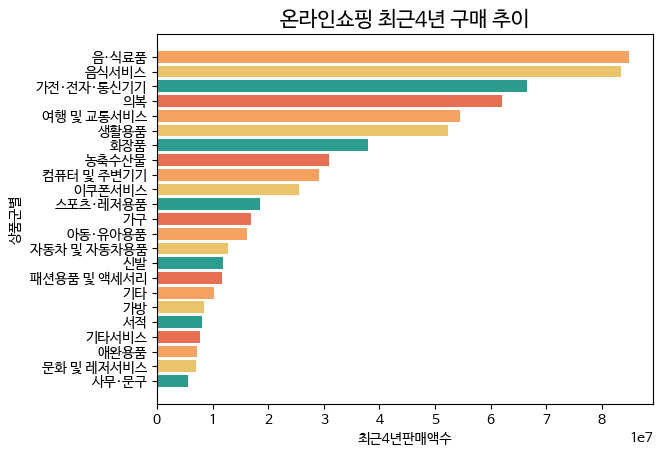

In [45]:
#최근 4년 구매추이 막대바그래프
import matplotlib.pyplot as plt
x=df_y['상품군별']
y=df_y['최근4년합계']
my_colors = ['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

plt.title('온라인쇼핑 최근4년 구매 추이',fontsize =15)     # 그래프 제목
plt.xlabel('최근4년판매액수')     # x축 이름
plt.ylabel('상품군별')      # y축 이름

plt.barh(x, y,color=my_colors)
plt.show()

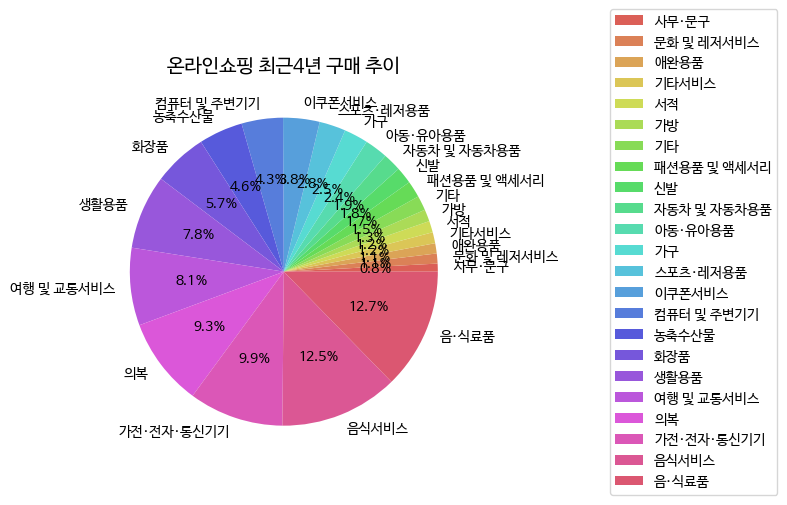

In [176]:
#최근 4년 구매추이 파이그래프
# plt.pie(df_y.최근4년합계, labels=df_y.상품군별, autopct='%1.1f%%')
# plt.show()
# plt.pie(df_y['최근4년합계'], labels=df_y['상품군별'], autopct=lambda x: f'{x:1.1f}%')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
labels = df_y['상품군별'].tolist()  # 상품군별 값들을 리스트로 변환
colors = sns.color_palette('hls', len(labels))
# my_colors = ['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.pie(df_y['최근4년합계'], labels=labels, autopct=lambda x: f'{x:1.1f}%', colors=colors)
plt.title('온라인쇼핑 최근4년 구매 추이', fontsize=14)
# plt.axis('equal')  # 원형 모양 유지
plt.legend(labels, loc='best',bbox_to_anchor=(1.5,0.5,0.3,0.7) )  # 범례 위치 조정
plt.show()

###최근 4년간 년도별 온라인 쇼핑추이

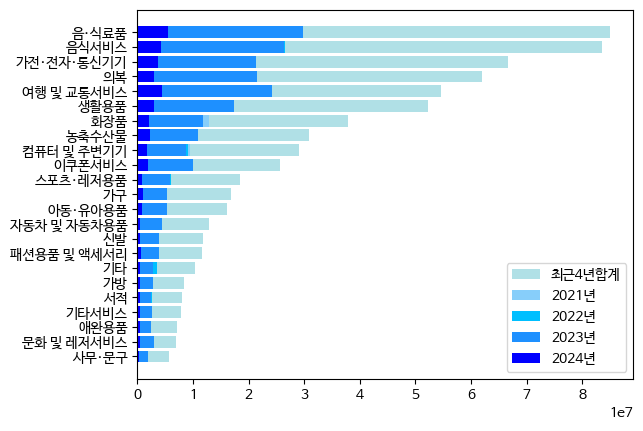

In [57]:
#여러개 바 나오기 실패
import matplotlib.pyplot as plt

x=df_y['상품군별']
y=df_y['최근4년합계']
y1=df_y['2021년']
y2=df_y['2022년']
y3=df_y['2023년']
y4=df_y['2024년2개월']

my_colors = ['#b0e0e6', '#87cefa', '#00bfff', '#e76f51','red','green']
plt.barh(x, y,label='최근4년합계',color='#b0e0e6')
plt.barh(x, y1,label='2021년',color='#87cefa')
plt.barh(x, y2,label='2022년',color='#00bfff')
plt.barh(x, y3,label='2023년',color='#1e90ff')
plt.barh(x, y4,label='2024년',color='#0000ff')

plt.legend()
plt.show()

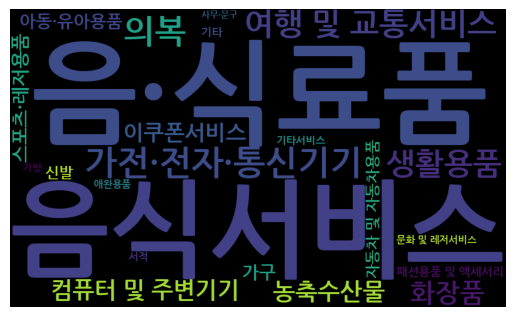

In [60]:
#워드 클라우드로 표현
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # (코랩)폰트 지정
data = dict(zip(df_y['상품군별'], df_y['최근4년합계']))
data
wc = WordCloud(width = 1000, height = 600,
               background_color="black",
               font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
# wc.to_file('./온라인쇼핑구매추이최근4년_워드클라우드.png')

###2021년 온라인 쇼핑구매추이

In [97]:
#2021년 상위 10개만 추출
df_2021=df_year.iloc[:,[0,1]]
df_2021년=df_2021.nlargest(10,'2021년')
df_2021년=df_2021년.sort_values(by = '2021년')# 아래 막대바 그래프를 위한 정렬
df_2021년

,상품군별,2021년
66,이쿠폰서비스,6099697
45,농축수산물,8333388
60,여행 및 교통서비스,9105134
3,컴퓨터 및 주변기기,9517073
36,화장품,12877171
48,생활용품,15390349
21,의복,17373945
6,가전·전자·통신기기,20694023
42,음·식료품,22914204
69,음식서비스,26159657


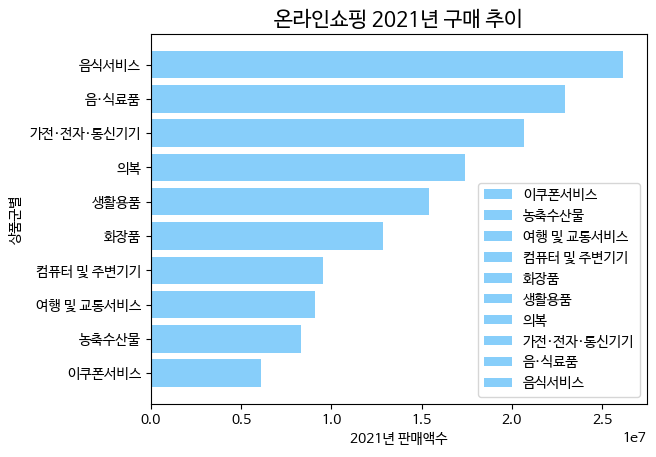

In [182]:
#2021년 상위 10개 막대바그래프
import matplotlib.pyplot as plt
import numpy as np

x=df_2021년['상품군별']
y=df_2021년['2021년']
labels = df_2021년['상품군별'].tolist()

# plt.figure(figsize=(8,5))
plt.title('온라인쇼핑 2021년 구매 추이',fontsize =15)
plt.xlabel('2021년 판매액수')
plt.ylabel('상품군별')
plt.barh(x, y,label=labels, color='#87cefa')
plt.legend(labels, loc='best', frameon=True)
plt.show()

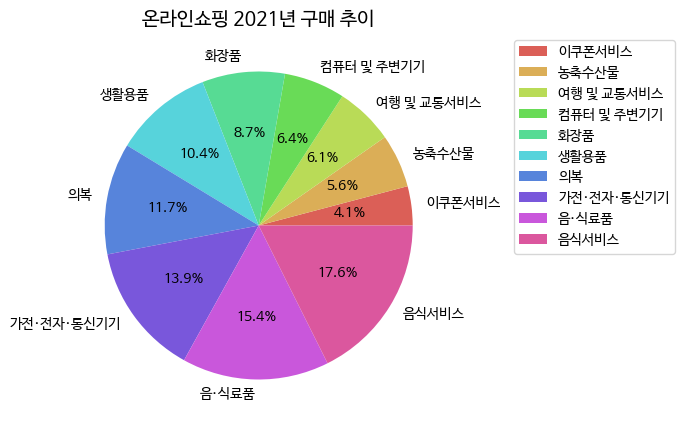

In [184]:
#2021년 상위 10개 파이그래프
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = df_2021년['상품군별'].tolist()  # 상품군별 값들을 리스트로 변환
colors = sns.color_palette('hls', len(labels))

plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.pie(df_2021년['2021년'], labels=labels, autopct=lambda x: f'{x:1.1f}%', colors=colors)
plt.title('온라인쇼핑 2021년 구매 추이', fontsize=14)
# plt.axis('equal')  # 원형 모양 유지
plt.legend(labels, loc='best',bbox_to_anchor=(1.3,0.5,0.3,0.5))  # 범례 위치 조정
plt.show()

###2022년 온라인 쇼핑구매추이

In [109]:
# 2022년 상위 10개만 추출
df_2022=df_year.iloc[:,[0,2]]
df_2022년=df_2022.nlargest(10,'2022년')
df_2022년=df_2022년.sort_values(by = '2022년' )
df_2022년


,상품군별,2022년
66,이쿠폰서비스,7535413
3,컴퓨터 및 주변기기,9131376
45,농축수산물,9479464
36,화장품,11063963
48,생활용품,16629707
60,여행 및 교통서비스,16816475
21,의복,20076958
6,가전·전자·통신기기,20935534
69,음식서비스,26585385
42,음·식료품,26661315


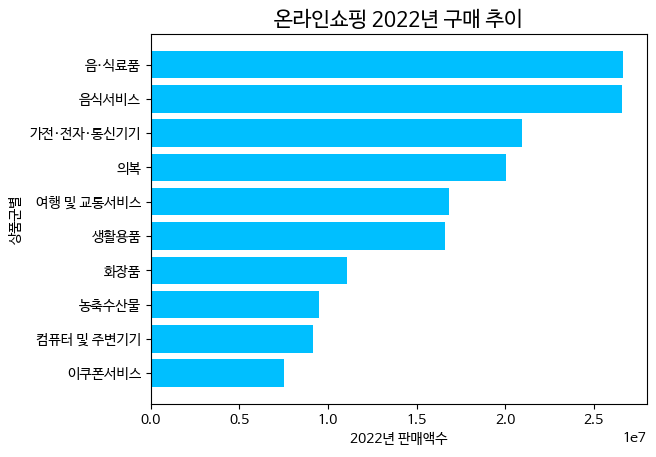

In [119]:
#2022년 상위 10개 막대바그래프
import matplotlib.pyplot as plt
x=df_2022년['상품군별']
y=df_2022년['2022년']
plt.title('온라인쇼핑 2022년 구매 추이',fontsize =15)
plt.xlabel('2022년 판매액수')
plt.ylabel('상품군별')
plt.barh(x, y,color='#00bfff')
plt.show()

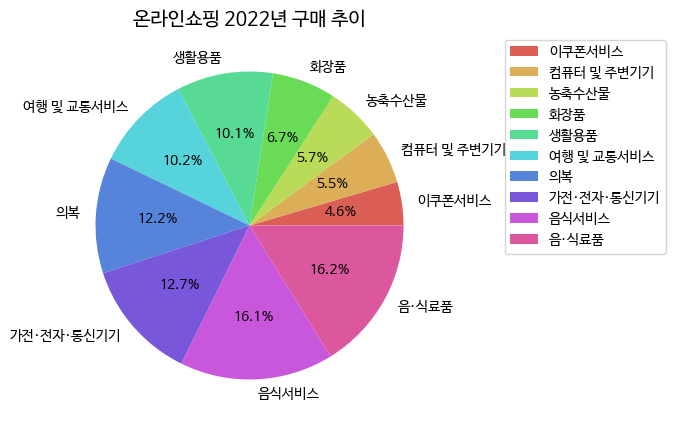

In [185]:
#2022년 상위 10개 파이그래프
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = df_2022년['상품군별'].tolist()  # 상품군별 값들을 리스트로 변환
colors = sns.color_palette('hls', len(labels))

plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.pie(df_2022년['2022년'], labels=labels, autopct=lambda x: f'{x:1.1f}%', colors=colors)
plt.title('온라인쇼핑 2022년 구매 추이', fontsize=14)
# plt.axis('equal')  # 원형 모양 유지
plt.legend(labels, loc='best',bbox_to_anchor=(1.3,0.5,0.3,0.5))  # 범례 위치 조정
plt.show()

###2023년 온라인 쇼핑구매추이

In [120]:
# 2023년 상위 10개만 추출
df_2023=df_year.iloc[:,[0,3]]
df_2023년=df_2023.nlargest(10,'2023년')
df_2023년=df_2023년.sort_values(by = '2023년')# 아래 막대바 그래프를 위한 정렬
df_2023년

,상품군별,2023년
3,컴퓨터 및 주변기기,8709380
66,이쿠폰서비스,10064899
45,농축수산물,10848859
36,화장품,11872063
48,생활용품,17305848
6,가전·전자·통신기기,21278521
21,의복,21478088
60,여행 및 교통서비스,24137332
69,음식서비스,26401165
42,음·식료품,29841518


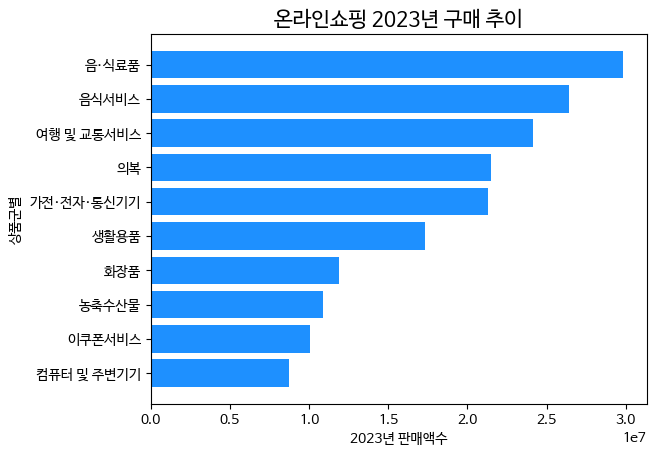

In [121]:
#2023년 상위 10개 막대바그래프
import matplotlib.pyplot as plt
x=df_2023년['상품군별']
y=df_2023년['2023년']
plt.title('온라인쇼핑 2023년 구매 추이',fontsize =15)
plt.xlabel('2023년 판매액수')
plt.ylabel('상품군별')
plt.barh(x, y,color='#1e90ff')
plt.show()

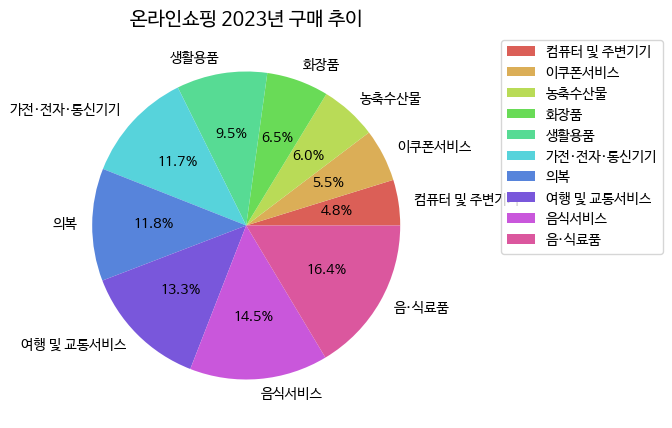

In [186]:
#2023년 상위 10개 파이그래프
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = df_2023년['상품군별'].tolist()  # 상품군별 값들을 리스트로 변환
colors = sns.color_palette('hls', len(labels))

plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.pie(df_2023년['2023년'], labels=labels, autopct=lambda x: f'{x:1.1f}%', colors=colors)
plt.title('온라인쇼핑 2023년 구매 추이', fontsize=14)
# plt.axis('equal')  # 원형 모양 유지
plt.legend(labels, loc='best',bbox_to_anchor=(1.3,0.5,0.3,0.5))  # 범례 위치 조정
plt.show()

###2024년(2개월) 온라인 쇼핑구매추이

In [122]:
# 2024년(2개월) 상위 10개만 추출
df_2024=df_year.iloc[:,[0,4]]
df_2024년=df_2024.nlargest(10,'2024년2개월')
df_2024년=df_2024년.sort_values(by = '2024년2개월')# 아래 막대바 그래프를 위한 정렬
df_2024년

,상품군별,2024년2개월
3,컴퓨터 및 주변기기,1734551
66,이쿠폰서비스,1912283
36,화장품,2059907
45,농축수산물,2283730
48,생활용품,2925540
21,의복,3058879
6,가전·전자·통신기기,3638961
69,음식서비스,4318175
60,여행 및 교통서비스,4458661
42,음·식료품,5499077


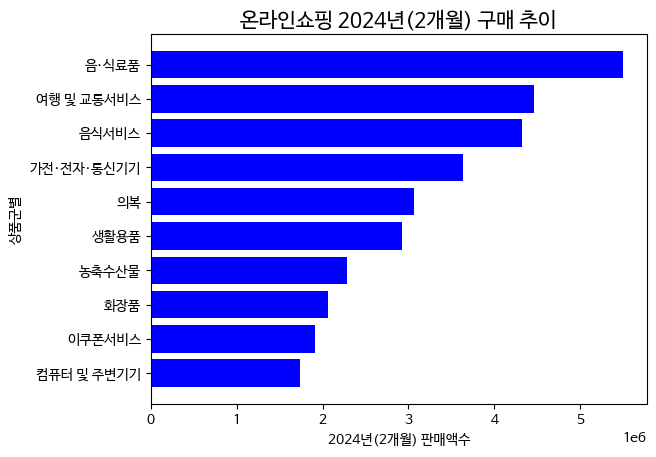

In [123]:
#2024년 상위 10개 막대바그래프
import matplotlib.pyplot as plt
x=df_2024년['상품군별']
y=df_2024년['2024년2개월']
plt.title('온라인쇼핑 2024년(2개월) 구매 추이',fontsize =15)
plt.xlabel('2024년(2개월) 판매액수')
plt.ylabel('상품군별')
plt.barh(x, y,color='#0000ff')
plt.show()

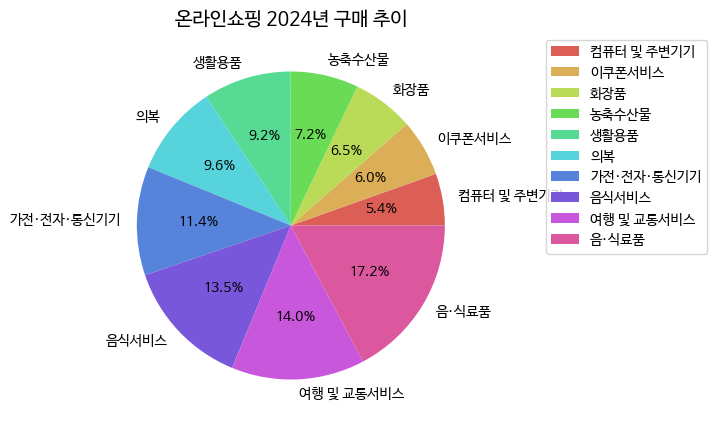

In [187]:
#2024년 상위 10개 파이그래프
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = df_2024년['상품군별'].tolist()  # 상품군별 값들을 리스트로 변환
colors = sns.color_palette('hls', len(labels))

plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.pie(df_2024년['2024년2개월'], labels=labels, autopct=lambda x: f'{x:1.1f}%', colors=colors)
plt.title('온라인쇼핑 2024년 구매 추이', fontsize=14)
# plt.axis('equal')  # 원형 모양 유지
plt.legend(labels, loc='best',bbox_to_anchor=(1.3,0.5,0.3,0.5))  # 범례 위치 조정
plt.show()